In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CREDIT CARD APPROVAL PREDICTION**

# **Importing required libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
df=pd.read_csv('/content/drive/MyDrive/Datasets/credit_card_approval.csv')
df

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1


# **Checking for missing data**

In [ ]:
df.isna().sum()

,0
Applicant_ID,0
Applicant_Gender,0
Owned_Car,0
Owned_Realty,0
Total_Children,0
Total_Income,0
Income_Type,0
Education_Type,0
Family_Status,0
Housing_Type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

# **Encoding**

In [ ]:
le=LabelEncoder()
df['Applicant_Gender']=le.fit_transform(df['Applicant_Gender'])
df['Income_Type']=le.fit_transform(df['Income_Type'])
df['Education_Type']=le.fit_transform(df['Education_Type'])
df['Family_Status']=le.fit_transform(df['Family_Status'])
df['Housing_Type']=le.fit_transform(df['Housing_Type'])
df['Job_Title']=le.fit_transform(df['Job_Title'])
df

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,1,1,1,0,112500,4,4,1,1,...,0,0,0,16,2,59,4,0,30,1
1,5008808,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,5,1
2,5008809,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,5,1
3,5008810,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,27,1
4,5008811,0,0,1,0,270000,0,4,3,1,...,0,1,1,14,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,0,1,1,1,157500,4,4,1,1,...,0,0,0,3,3,30,5,0,18,1
25124,5150483,0,1,1,1,157500,4,4,1,1,...,0,0,0,3,3,30,5,0,18,1
25125,5150484,0,1,1,1,157500,4,4,1,1,...,0,0,0,3,3,30,5,0,13,1
25126,5150485,0,1,1,1,157500,4,4,1,1,...,0,0,0,3,3,30,5,0,2,1


# **Checking correlation**

In [ ]:
df.corr()['Status']

,Status
Applicant_ID,-0.011544
Applicant_Gender,-0.019264
Owned_Car,-0.001604
Owned_Realty,0.002716
Total_Children,0.011036
Total_Income,-0.003482
Income_Type,0.013117
Education_Type,0.003486
Family_Status,-0.013942
Housing_Type,-0.001707


# **Deleting the columns with low correlation**

In [ ]:
df.drop(['Applicant_ID','Applicant_Gender','Education_Type','Owned_Mobile_Phone','Owned_Work_Phone','Owned_Phone','Owned_Email','Applicant_Age'],axis=1,inplace=True)

<Axes: >

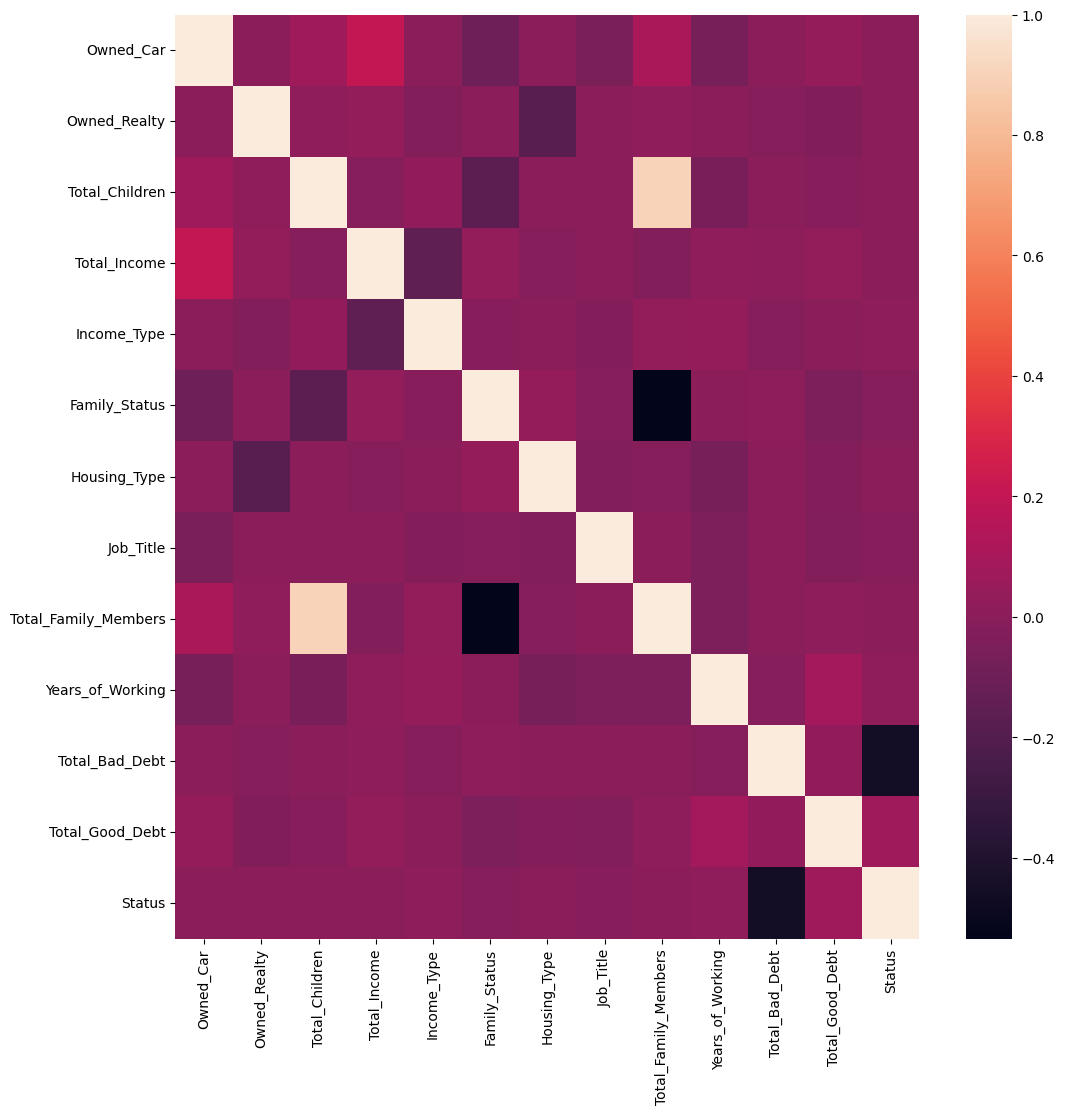

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),)

In [ ]:
X=df.drop('Status',axis=1)
y=df['Status']

In [ ]:
X

,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Family_Status,Housing_Type,Job_Title,Total_Family_Members,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,1,1,0,112500,4,1,1,16,2,4,0,30
1,0,1,0,270000,0,3,1,14,1,9,0,5
2,0,1,0,270000,0,3,1,14,1,9,0,5
3,0,1,0,270000,0,3,1,14,1,9,0,27
4,0,1,0,270000,0,3,1,14,1,9,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
25123,1,1,1,157500,4,1,1,3,3,5,0,18
25124,1,1,1,157500,4,1,1,3,3,5,0,18
25125,1,1,1,157500,4,1,1,3,3,5,0,13
25126,1,1,1,157500,4,1,1,3,3,5,0,2


In [ ]:
y

,Status
0,1
1,1
2,1
3,1
4,1
...,...
25123,1
25124,1
25125,1
25126,1


# **Scaling**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.        , ..., 0.06976744, 0.        ,
        0.48333333],
       [0.        , 1.        , 0.        , ..., 0.18604651, 0.        ,
        0.06666667],
       [0.        , 1.        , 0.        , ..., 0.18604651, 0.        ,
        0.06666667],
       ...,
       [1.        , 1.        , 0.2       , ..., 0.09302326, 0.        ,
        0.2       ],
       [1.        , 1.        , 0.2       , ..., 0.09302326, 0.        ,
        0.01666667],
       [1.        , 0.        , 0.        , ..., 0.11627907, 0.        ,
        0.48333333]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [ ]:
df['Status'].value_counts()

,count
Status,
1,25007
0,121


# **Performing Oversampling**

In [ ]:
#Perform oversampling on 0 using smote
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

# **Training, Testing and Model building**

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gnb=GaussianNB()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,svc,dtc,rfc,gnb,abc,gbc,xgb]
acc={}
for model in models:
  print('*'*50)
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy) # Calculate accuracy
  acc[model.__class__.__name__] = accuracy  # Store accuracy

**************************************************
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.28      0.52      0.37        25
           1       1.00      0.99      1.00      5001

    accuracy                           0.99      5026
   macro avg       0.64      0.76      0.68      5026
weighted avg       0.99      0.99      0.99      5026

0.9910465578989256
**************************************************
SVC()
              precision    recall  f1-score   support

           0       0.36      0.72      0.48        25
           1       1.00      0.99      1.00      5001

    accuracy                           0.99      5026
   macro avg       0.68      0.86      0.74      5026
weighted avg       1.00      0.99      0.99      5026

0.9922403501790689
**************************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.84      0.84      0.84   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       1.00      1.00      1.00      5001

    accuracy                           1.00      5026
   macro avg       0.89      0.98      0.93      5026
weighted avg       1.00      1.00      1.00      5026

0.9984082769598089
**************************************************
GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        25
           1       1.00      1.00      1.00      5001

    accuracy                           1.00      5026
   macro avg       0.87      1.00      0.92      5026
weighted avg       1.00      1.00      1.00      5026

0.9982093115797851
**************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early

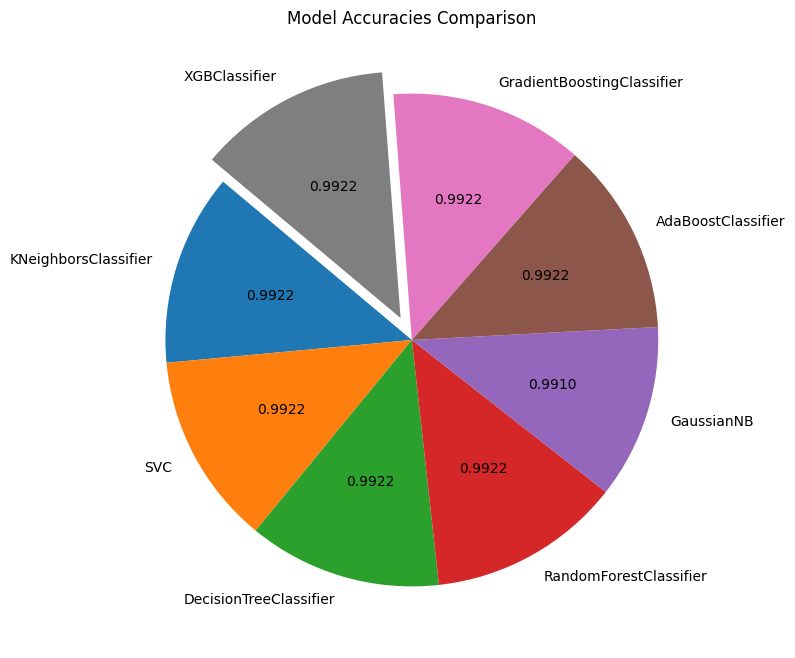

In [ ]:
import matplotlib.pyplot as plt
labels = list(acc.keys())
sizes = list(acc.values())
explode = [0.1 if max(sizes) == value else 0 for value in sizes]
def absolute_values(val):
    idx = int(val / 100 * len(sizes))  # Get the index of the value
    return f'{sizes[idx]:.4f}'
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, labels=labels, autopct=absolute_values, explode=explode, startangle=140
)
plt.title('Model Accuracies Comparison')
plt.show()

# **Confusion Matrix Display**

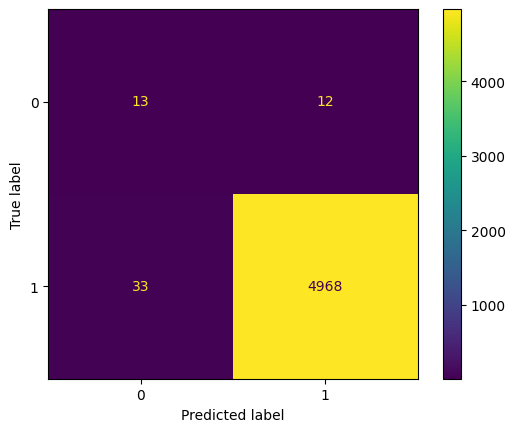

In [ ]:
#knn
y_pred1=knn.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

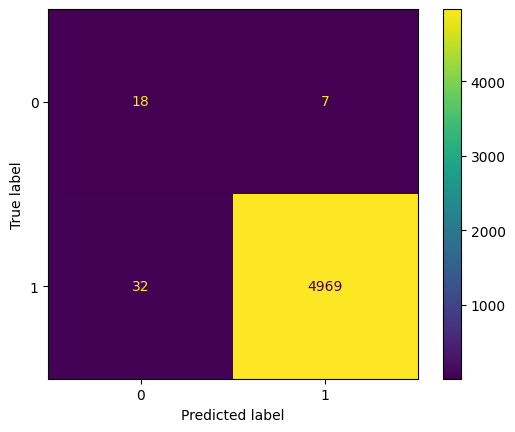

In [ ]:
#svc
y_pred1=svc.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

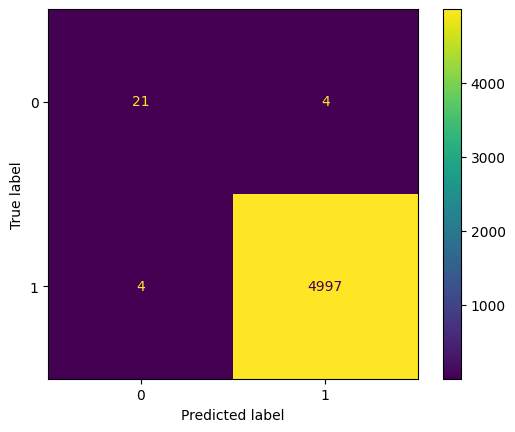

In [ ]:
#Decision tree classifier
y_pred1=dtc.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

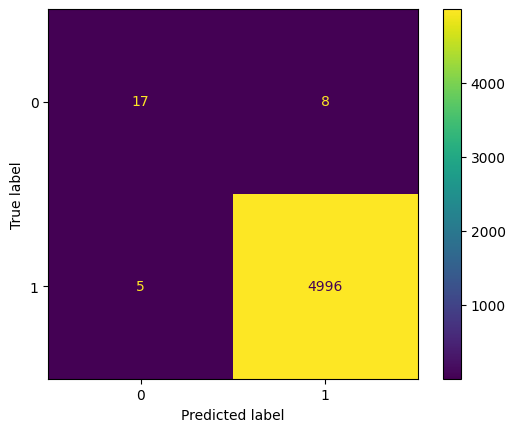

In [ ]:
#Random Forest Classifier
y_pred1=rfc.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

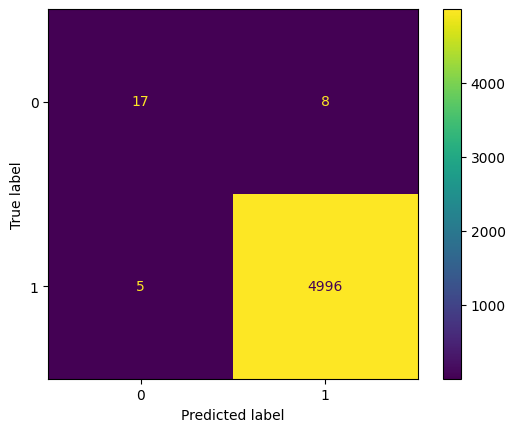

In [ ]:
#Gaussian Naive Baeyes_pred1=gnb.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

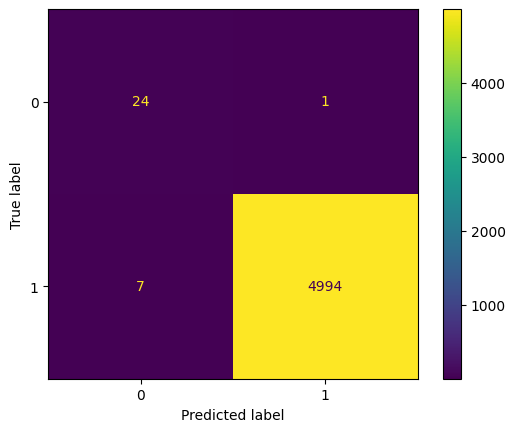

In [ ]:
#Adaboost Classifier
y_pred1=abc.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

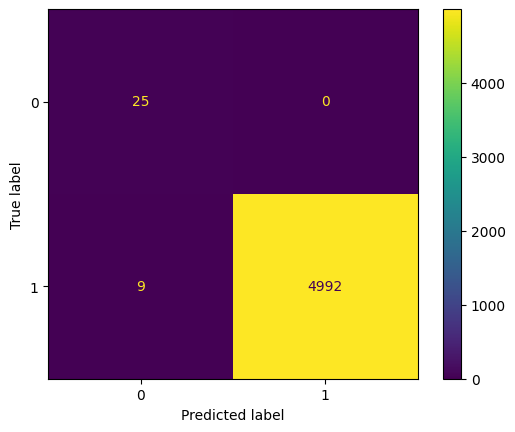

In [ ]:
#Gradient boost classifier
y_pred1=gbc.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

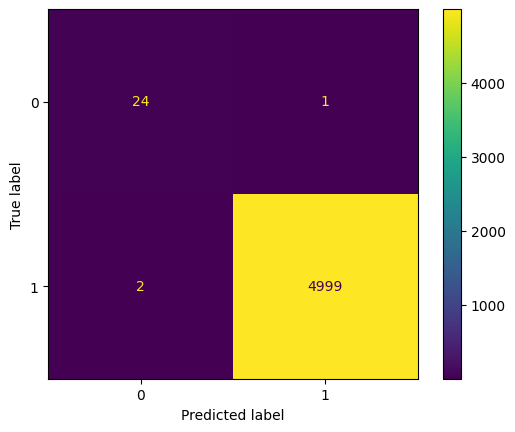

In [ ]:
#XGBoost classifier
y_pred1=xgb.predict(X_test)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1))
cm.plot()
plt.show()

In [ ]:
pickle.dump(le,open('le.sav','wb'))

In [ ]:
pickle.dump(xgb,open('model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))